# Task 2

## Objectives

### Images Used:  
  1. *9343 AM*  
  2. *10905 JL*  
  3. *43590 AM*  


### Edge Detection Algorithm Applied
  Canny Edge Detection

### Discussion Points 
  - Analyze the effectiveness of  Canny Edge Detection on the three provided images using F1 score.


In [19]:
# Importing necessary libraries
import skimage
from skimage.color import rgb2gray

import scipy
import scipy.signal

from matplotlib import pyplot as plt

import numpy as np

import cv2

from sklearn.metrics import f1_score
from skimage.feature import canny

from utils import display_original_and_gt, display_single, display_filtered_edge_results

In [20]:
# Loading images
image_names = ['9343 AM', '10905 JL', '43590 AM']

In [21]:
images = []  # List for original image
ground_truths = []  # List for ground truth images
for image_name in image_names:
    print(f'{image_name} ')
    image = skimage.io.imread(f'Data 06 30213/cells/{image_name}.bmp')
    images.append(image)

    ground_truth = skimage.io.imread(
        f'Data 06 30213/cells/{image_name} Edges.bmp')
    ground_truths.append(ground_truth)

9343 AM 
10905 JL 
43590 AM 


In [22]:
grayscale_images = []  # List for original image after GRAYSCALING
for i, image in enumerate(images):
    grayscale_image = rgb2gray(image)
    grayscale_images.append(grayscale_image)

In [23]:
def get_binary_get(image):
    # Convert to grayscale by taking the mean of the RGB channels (or use any preferred method)
    gray_ground_truth = rgb2gray(image)

    # Create binary ground truth: 1 for edxges (black pixels), 0 for non-edges (white pixels)
    binary_gt = (gray_ground_truth < 0.5).astype(int)
    return binary_gt

In [24]:
binary_ground_truths = []  # List for groud truth images (IN BINARY)
for gt_image in ground_truths:
    binary_ground_truths.append(get_binary_get(gt_image))

In [25]:
def calculate_f1_score(ground_truth, detected_edges):
    print(ground_truth)
    print(detected_edges)
    # Flatten the arrays to make them 1D for comparison
    ground_truth_flat = ground_truth.flatten()
    detected_edges_flat = detected_edges.flatten()

    # Calculate F1 score using sklearn's f1_score function
    f1_value = f1_score(ground_truth_flat, detected_edges_flat)
    return f1_value

In [65]:
# Canny edge detection
l_t = 0.1
canny_imgs = []
for image in grayscale_images:
    canny_imgs.append(canny(image, sigma=1,low_threshold=l_t, high_threshold=l_t*2).astype(int))

In [66]:
canny_imgs_f1 = []
canny_imgs_f1.append(calculate_f1_score(
    binary_ground_truths[0], canny_imgs[0]))
canny_imgs_f1.append(calculate_f1_score(
    binary_ground_truths[1], canny_imgs[1]))
canny_imgs_f1.append(calculate_f1_score(
    binary_ground_truths[2], canny_imgs[2]))

print(canny_imgs_f1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0.38149690573569806, 0.46822157434402334, 0.13831397589035063]


3


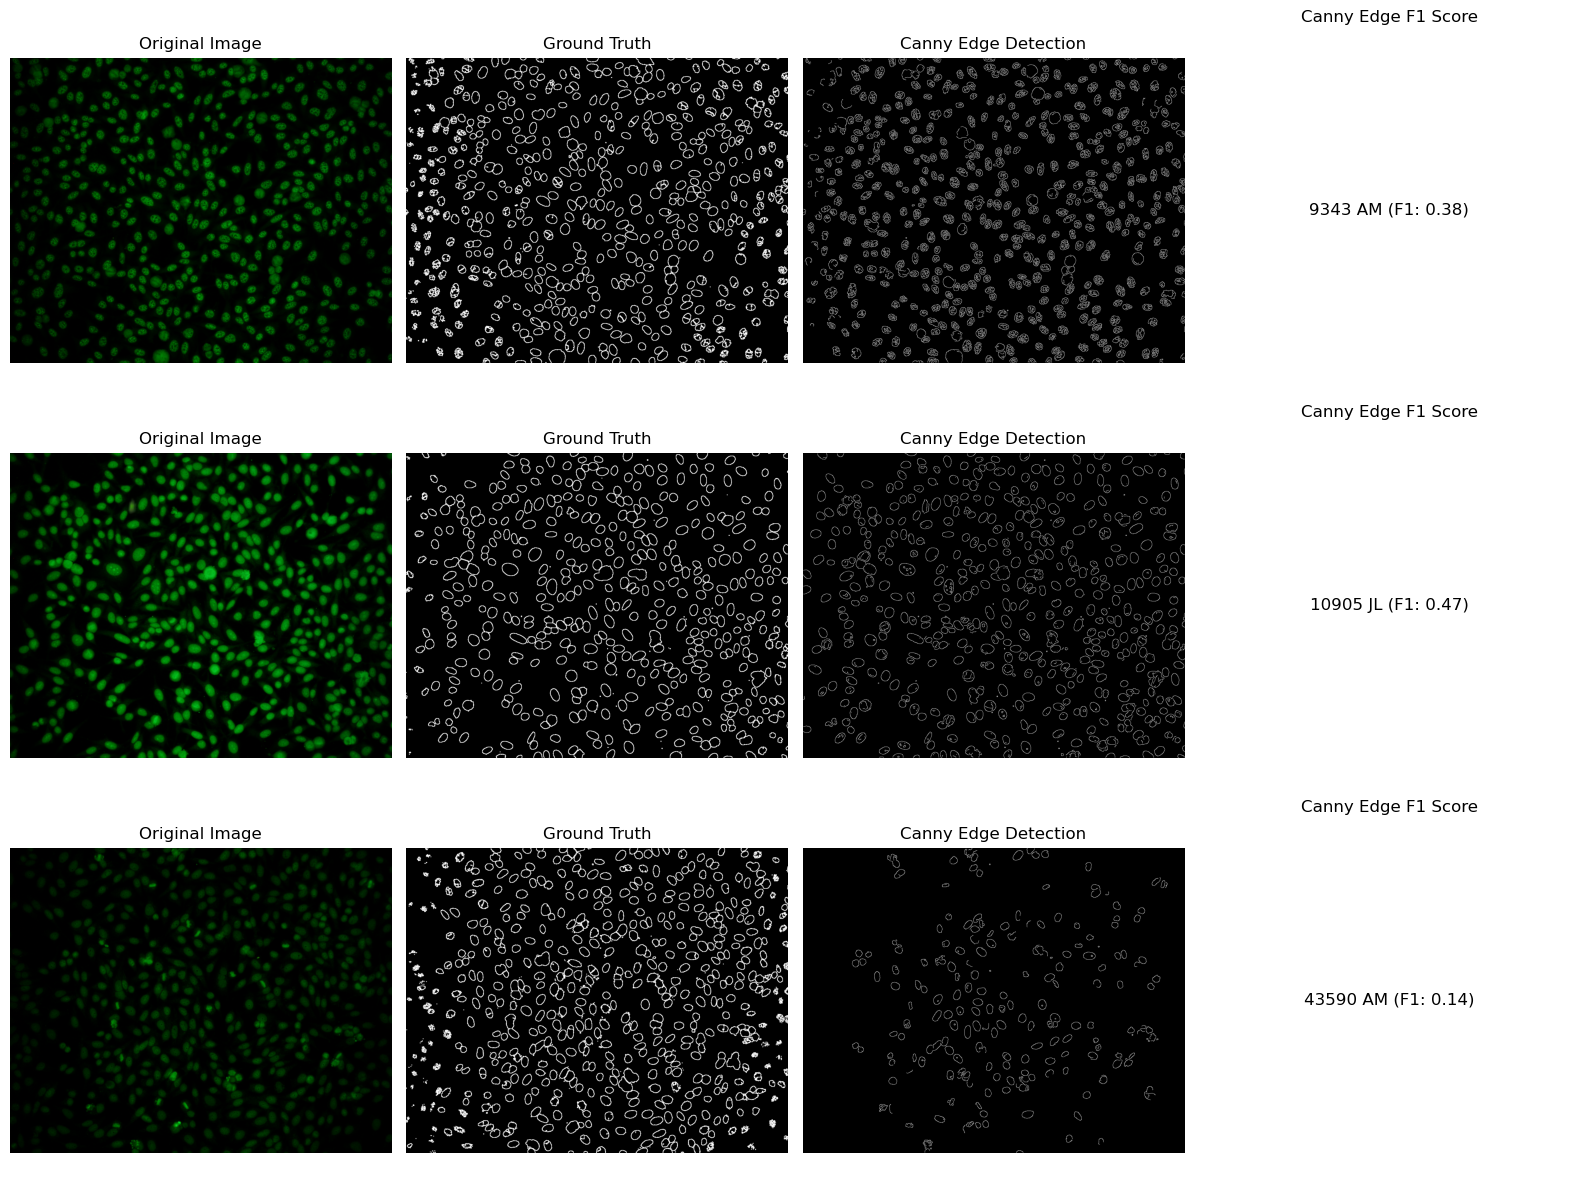

: 

: 

In [ ]:
def display_images(img_name, img, ground_truth, canny_imgs, canny_imgs_f1):
    # Determine the number of rows (one per image set)
    num_rows = len(img_name)
    print(num_rows)

    # Create a figure with enough space for the images
    fig, axes = plt.subplots(num_rows, 4, figsize=(16, 4 * num_rows))

    # Display each image set in a row
    for i in range(num_rows):
        # Row title with image name
        row_title = f"{img_name[i]} (F1: {canny_imgs_f1[i]:.2f})"

        # Original image
        axes[i, 0].imshow(img[i], cmap="gray")
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis("off")

        # Ground truth
        axes[i, 1].imshow(ground_truth[i], cmap="gray")
        axes[i, 1].set_title("Ground Truth")
        axes[i, 1].axis("off")

        # Canny Edge Detection Result
        axes[i, 2].imshow(canny_imgs[i], cmap="gray")
        axes[i, 2].set_title("Canny Edge Detection")
        axes[i, 2].axis("off")

        # Canny Edge Detection + F1 Score Text
        axes[i, 3].text(
            0.5, 0.5, f"{row_title}", ha="center", va="center", fontsize=12
        )
        axes[i, 3].set_title("Canny Edge F1 Score")
        axes[i, 3].axis("off")

    plt.tight_layout()
    plt.show()


display_images(image_names, images, binary_ground_truths,
               canny_imgs, canny_imgs_f1)

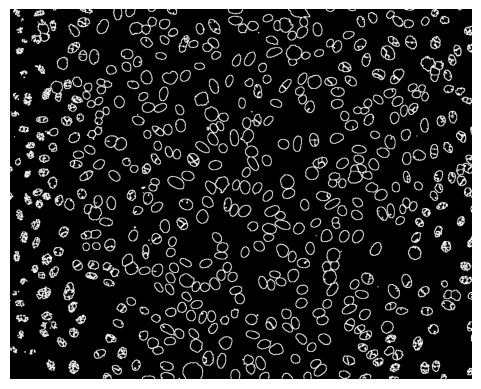

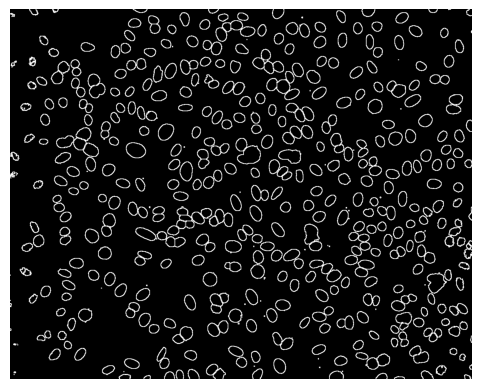

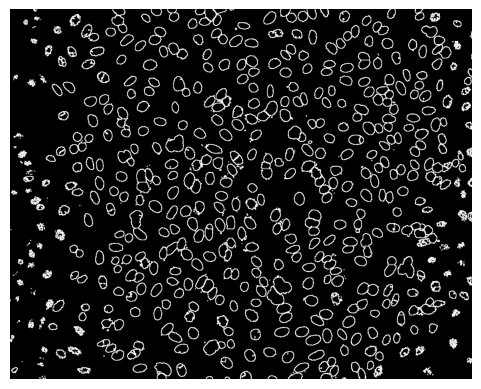

: 

: 

: 

: 

: 

: 

: 

In [ ]:
for ground_truth in binary_ground_truths:
    display_single(ground_truth)

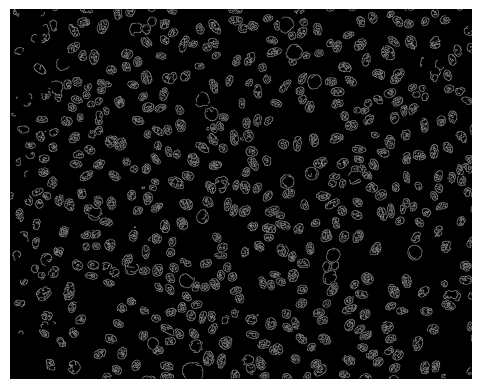

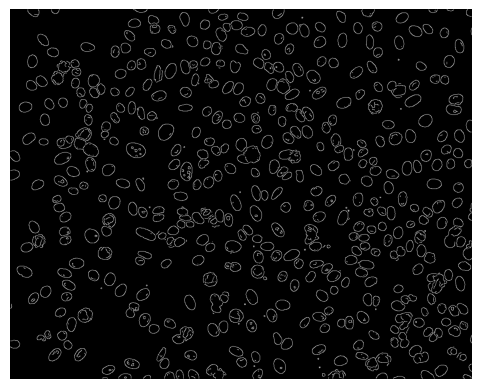

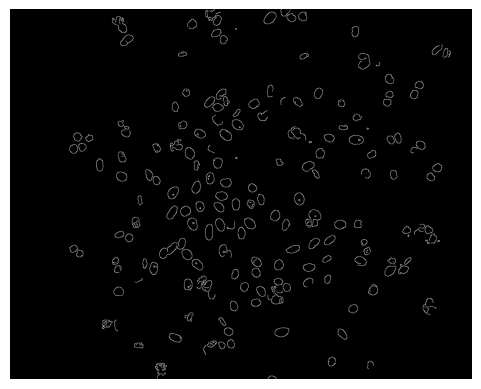

: 

: 

In [ ]:
for img in canny_imgs:
    display_single(img)

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 